In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('/content/seattle-weather.csv')

In [47]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [48]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [49]:
df.duplicated().sum()

np.int64(0)

In [50]:
#coulmn Open converted into numpy array
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [51]:
len(training_set)

1461

In [52]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [53]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [54]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [55]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [56]:
regressor = Sequential()

In [57]:
#Addinf the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

# Change return_sequences to False for the last LSTM layer
regressor.add(LSTM(units=50, return_sequences = False))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
regressor.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
#Compiling
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [61]:
#fitting the rnn to the training set
regressor.compile(optimizer='adam',loss='mean_squared_error')
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=30, batch_size=64)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 259.4588 - val_loss: 345.4110
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 160.5155 - val_loss: 241.6019
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 109.9728 - val_loss: 184.8730
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 85.8917 - val_loss: 159.0748
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 72.0177 - val_loss: 142.9571
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 68.7558 - val_loss: 129.4783
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 62.8385 - val_loss: 119.0005
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 60.0996 - val_loss: 111.0114
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 55.8249 - val_loss: 104.0891
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 53.6773 - val_loss: 98.4449
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 55.8575 - val_loss: 93.9881
Epoch 12/30
13/13 ━━━━━━━━━━━

In [62]:
his = pd.DataFrame(history.history)

In [63]:
his.head()

,loss,val_loss
0,235.168518,345.411041
1,146.543503,241.601898
2,101.320198,184.872971
3,81.618683,159.074814
4,72.515678,142.957092


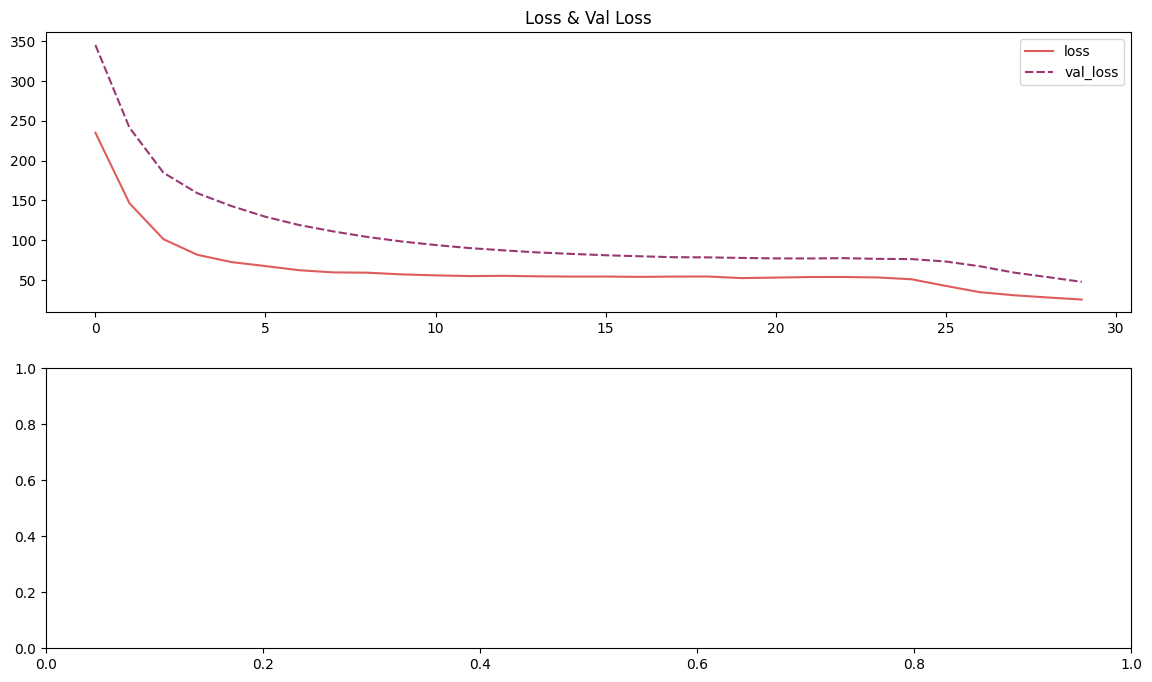

In [64]:
import seaborn as sns
his.columns
history_loss = his[['loss', 'val_loss']]


fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");



In [65]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


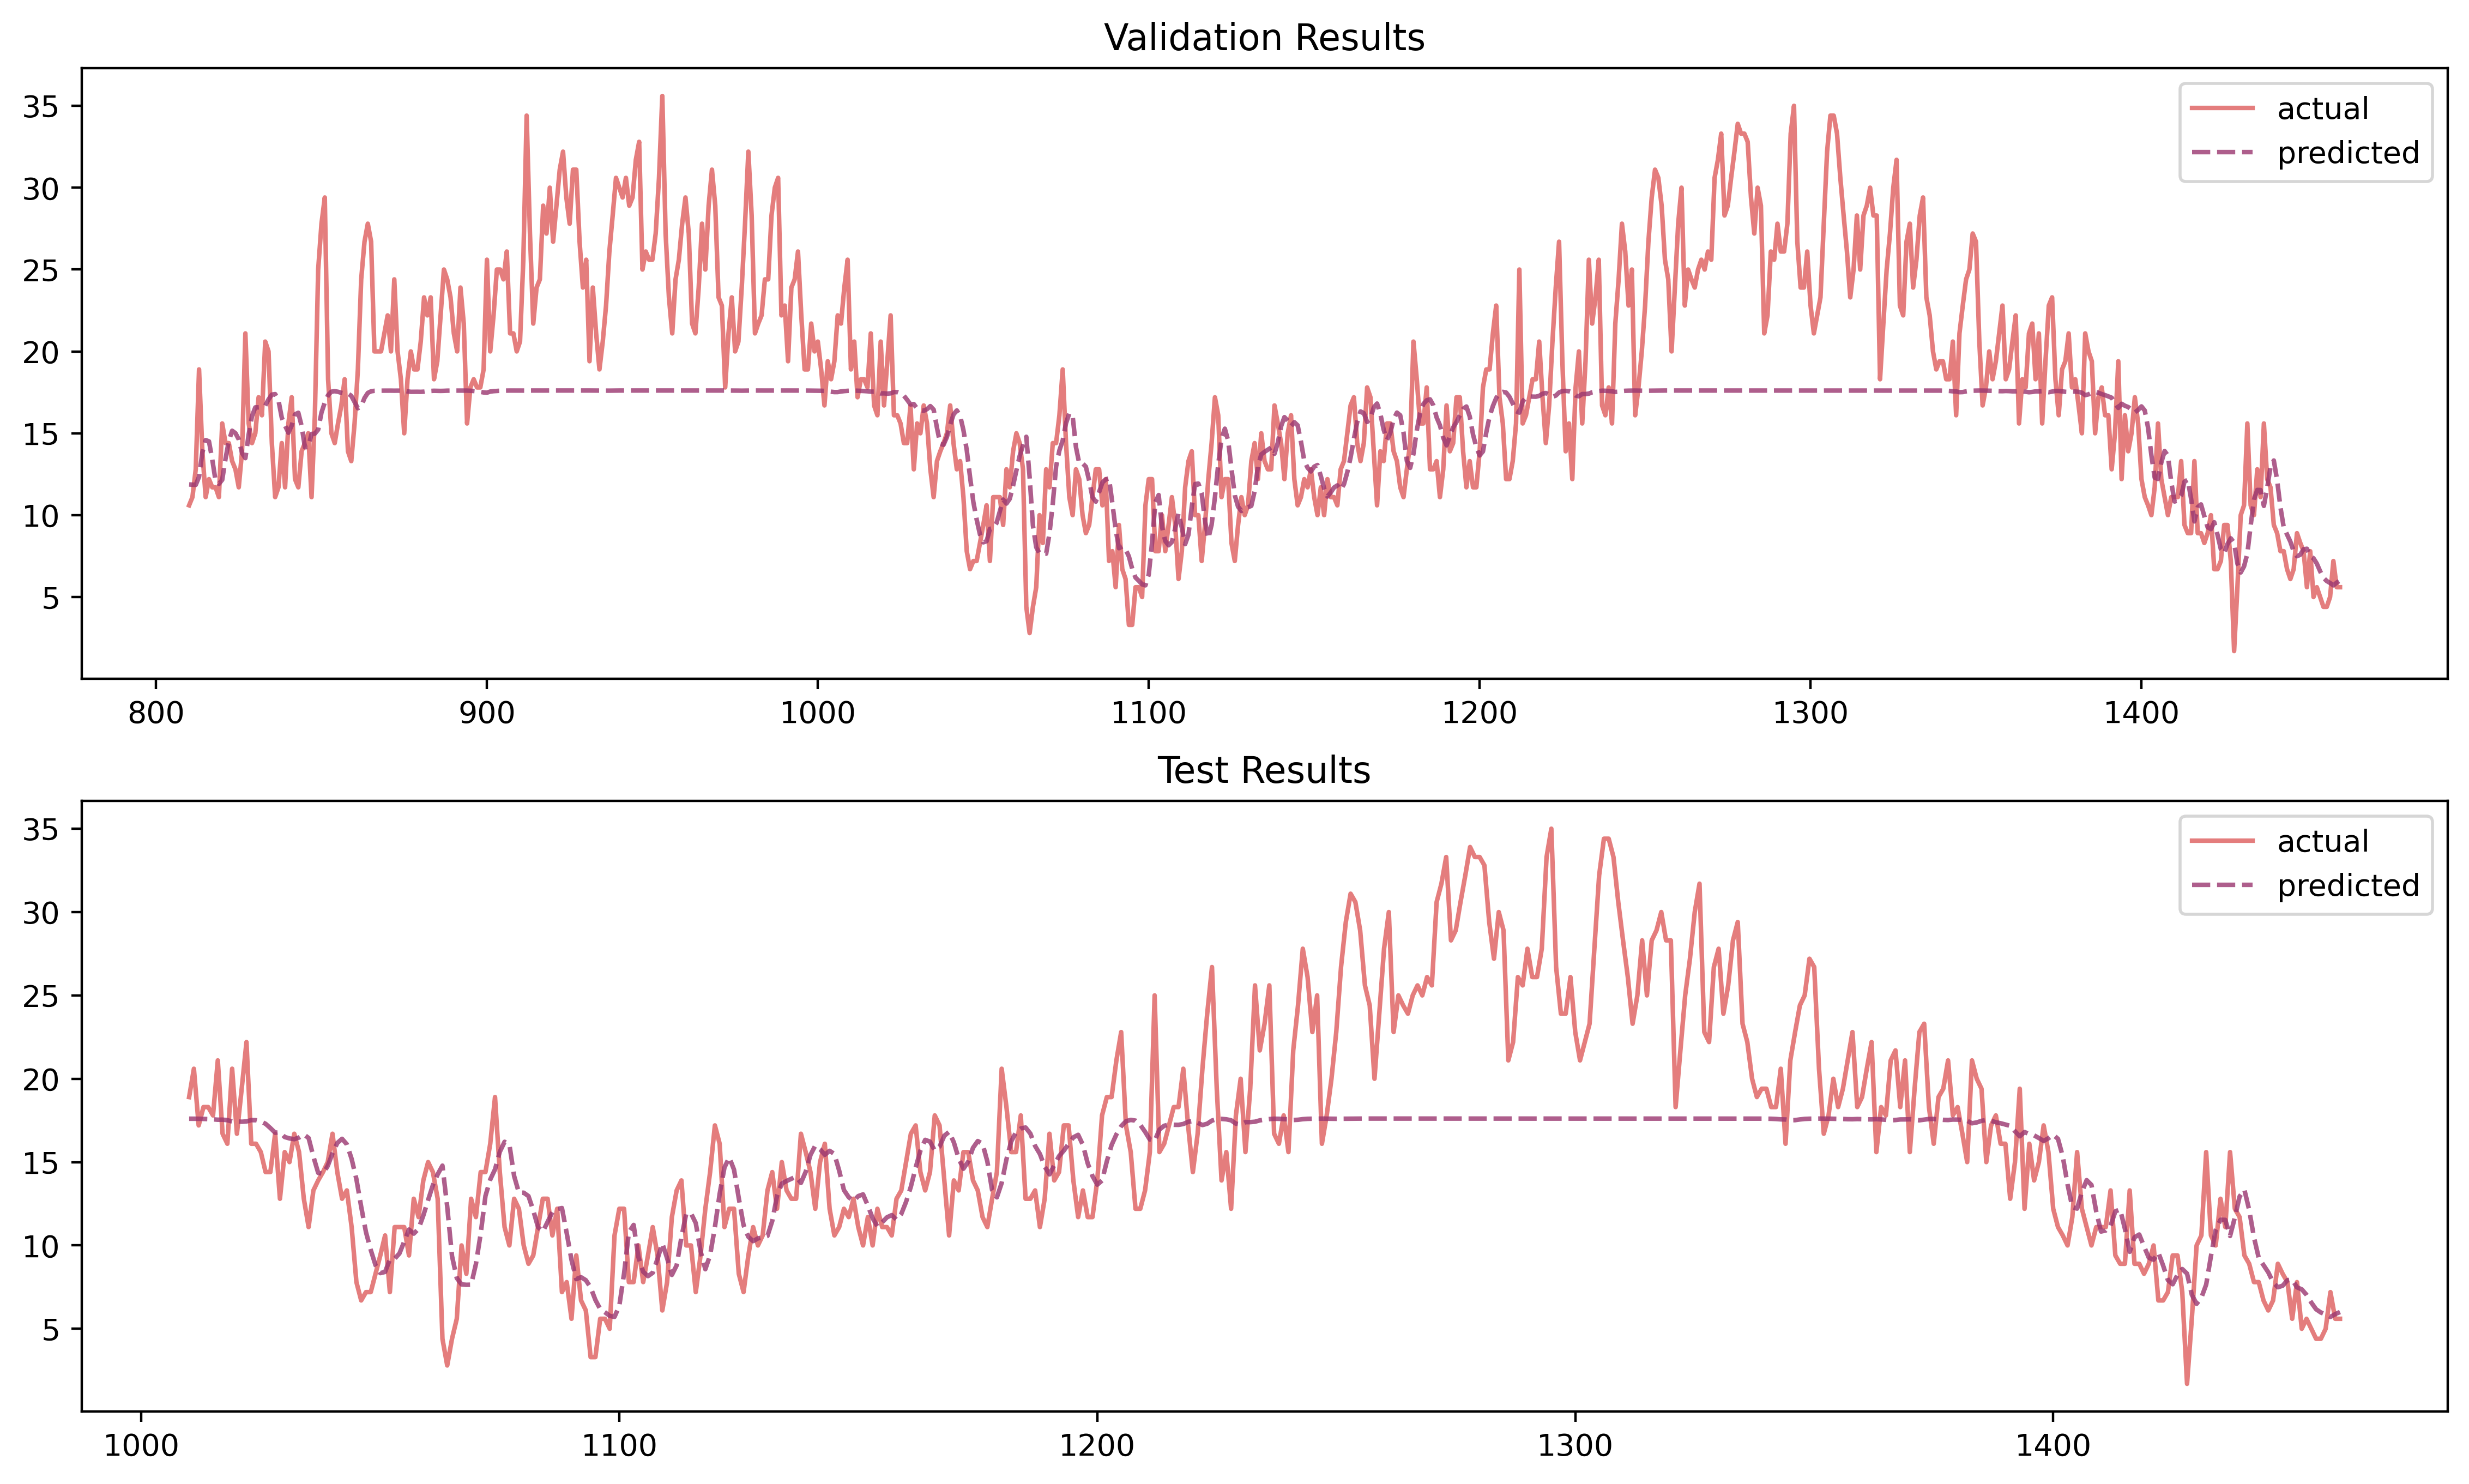

In [66]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);